In [1]:
#Importing all the required modules.
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading the given Patient Dataset
df = pd.read_excel('Data - Project 3.xlsx')

In [3]:
#displaying the data set
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,Height (cm),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Assigned Subject ID,DOB,Initial X-ray Date,Initial Age at initial X-ray time versus the b...,Sex,Brace Treatment,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),...,Curve Classfication from TSC,AVR Measurement,No. of exercise sessions,Major Curve change,Progression/Non progression,NaN,NaN,NaN,NaN,Comments
2,TSC19,2001-12-06 00:00:00,2016-04-16 00:00:00,14,M,No,171,18,NaN,NaN,...,3C-A2,7.6,8,12,P,NaN,NaN,NaN,NaN,NaN
3,TSC132,2002-08-11 00:00:00,2017-01-04 00:00:00,14,F,Yes,161,8,35,25,...,N3N4-C2,-10.5,12,0,NP,NaN,NaN,NaN,NaN,NaN
4,TSC140,2002-09-15 00:00:00,2016-11-01 00:00:00,14,F,No,154.9,-12,NaN,NaN,...,4C - B1,-6.4,8,4,NP,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preparation and Cleaning

In [4]:
df.columns = df.iloc[1]
df.drop([0,1], inplace = True) #Dropping the First two rows
print(df.columns) #printing all the column names to check for correct names
print("Hello World Experimenting")

Index([                                   'Assigned Subject ID',
                                                          'DOB',
                                           'Initial X-ray Date',
       'Initial Age at initial X-ray time versus the birthdate',
                                                          'Sex',
                                              'Brace Treatment',
                                                      'At rest',
                     'Max Scoliometer Standing for major curve',
                              'Inclinometer (Kyphosis)(T1/T12)',
                              'Inclinometer (lordosis)(T12/S2)',
                                                  'Risser sign',
                                            'Major Curve Angle',
                                              'Curve direction',
                                                 'Curve Number',
                                                 'Curve Length',
                         

In [5]:
columns_to_drop = ['Comments']  # Dropping the comment column as it does not add value in predicting the target variables
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
df= df.dropna(axis=1, how="all") #Dropping the Columns with all the Values as "NaN"

In [7]:
df = df.iloc[:-5] #Dropping the Rows with all the Values as "NaN"

In [8]:
df = df.drop_duplicates() #Ensuring that there are no duplicates
print('The Shape of the dataset is:',df.shape)
df.isnull().sum() #Gives the Total Number of Null Values Present in each columns

The Shape of the dataset is: (297, 21)


1
Assigned Subject ID                                        6
DOB                                                        7
Initial X-ray Date                                         8
Initial Age at initial X-ray time versus the birthdate     7
Sex                                                        5
Brace Treatment                                            5
At rest                                                   29
Max Scoliometer Standing for major curve                  48
Inclinometer (Kyphosis)(T1/T12)                           42
Inclinometer (lordosis)(T12/S2)                           42
Risser sign                                                8
Major Curve Angle                                          3
Curve direction                                            7
Curve Number                                               7
Curve Length                                               7
Curve Location                                             7
Curve Classfication fr

In [9]:
df = df.dropna() #Dropping the rows with Null Values to avoid model Overfitting
print('The Shape of the dataset after dropping null values is:',df.shape)

The Shape of the dataset after dropping null values is: (213, 21)


In [10]:
#Cleaning the data present in the 'Initial X-Ray Date' and 'DOB' columns [Removing Time]
df['Initial X-ray Date'] = pd.to_datetime(df['Initial X-ray Date'], errors='coerce')
df['Initial X-ray Date'] = df['Initial X-ray Date'].dt.strftime('%Y-%m-%d')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['DOB'] = df['DOB'].dt.strftime('%Y-%m-%d')

In [11]:
#Converting the numerical columns from 'object' type to 'numeric' type 
columns_to_check = ['Initial Age at initial X-ray time versus the birthdate','At rest','Max Scoliometer Standing for major curve',
                    'Inclinometer (Kyphosis)(T1/T12)','Inclinometer (lordosis)(T12/S2)','Risser sign','Major Curve Angle','Curve Number',
                    'Curve Length','AVR Measurement','No. of exercise sessions','Major Curve change'] 

for column in columns_to_check:
    try:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    except ValueError:
        #Removing the values which are not numeric in the numerical column [e.g. Height Value is 'NS' for the subject ID 'TSC802' so removing all such values]
        non_numeric_rows = df[~df[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
        df = df[pd.to_numeric(df[column], errors='coerce').notna()]

In [12]:
df = df.dropna() #Dropping the Null Values to avoid Overfitting
print('The shape of the data set:',df.shape)

The shape of the data set: (211, 21)


In [13]:
#Cleaning the data of the 'Curve Classification' Column [Removing all Symbols]
def clean_curve_classification(value):
    value = re.sub(r'[^\w\s\d]', '', value)
    #Combining alphanumeric characters without spaces
    value = ''.join(value.split())
    return value
df['Curve Classfication from TSC'] = df['Curve Classfication from TSC'].apply(clean_curve_classification)

In [14]:
df.dtypes

1
Assigned Subject ID                                        object
DOB                                                        object
Initial X-ray Date                                         object
Initial Age at initial X-ray time versus the birthdate      int64
Sex                                                        object
Brace Treatment                                            object
At rest                                                   float64
Max Scoliometer Standing for major curve                  float64
Inclinometer (Kyphosis)(T1/T12)                             int64
Inclinometer (lordosis)(T12/S2)                             int64
Risser sign                                                 int64
Major Curve Angle                                           int64
Curve direction                                            object
Curve Number                                                int64
Curve Length                                                int64
Curve Lo

Now some of the above data has "object" data type. So changing them to numerical data.

In [15]:
#Converting columns to Numeric and ignoring the columns 'DOB' and 'Initial X-ray Date' as these are not important
numerical_columns = ['Initial Age at initial X-ray time versus the birthdate',
                      'At rest','Max Scoliometer Standing for major curve','Inclinometer (Kyphosis)(T1/T12)',
                      'Inclinometer (lordosis)(T12/S2)','Major Curve Angle',
                      'Curve Length','AVR Measurement','No. of exercise sessions', 'Major Curve change']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [16]:
#Converting all Categorical Columns to Numeical columns by performing Label Encoding
categorical_columns = ['Sex','Brace Treatment','Risser sign','Curve direction','Curve Number','Curve Location','Curve Classfication from TSC','Progression/Non progression']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [17]:
df.dtypes

1
Assigned Subject ID                                        object
DOB                                                        object
Initial X-ray Date                                         object
Initial Age at initial X-ray time versus the birthdate      int64
Sex                                                         int64
Brace Treatment                                             int64
At rest                                                   float64
Max Scoliometer Standing for major curve                  float64
Inclinometer (Kyphosis)(T1/T12)                             int64
Inclinometer (lordosis)(T12/S2)                             int64
Risser sign                                                 int64
Major Curve Angle                                           int64
Curve direction                                             int64
Curve Number                                                int64
Curve Length                                                int64
Curve Lo

Now we can see that all the data except first three columns are of  numeric data type

In [18]:
#Ignoring the first three columns 'Assigned Subject ID', 'DOB', and 'Initial X-ray Date'
columns_to_numerical = df[numerical_columns]
category_to_numerical = df[categorical_columns]
imp_df = pd.concat([columns_to_numerical,category_to_numerical],axis=1)

In [19]:
imp_df #Printing the Data with all Numerical Values

1,Initial Age at initial X-ray time versus the birthdate,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Major Curve Angle,Curve Length,AVR Measurement,No. of exercise sessions,Major Curve change,Sex,Brace Treatment,Risser sign,Curve direction,Curve Number,Curve Location,Curve Classfication from TSC,Progression/Non progression
9,13,163.83,-12.0,32,57,32,7,-16.2,10,2.0,0,1,3,0,1,0,3,0
10,15,163.15,-5.0,65,50,38,6,22.4,7,-2.0,0,0,4,0,0,0,12,0
12,13,165.70,-10.0,26,20,35,6,-12.1,3,-5.0,0,0,5,0,0,2,12,0
13,11,162.50,-8.0,40,45,28,8,-7.4,13,-1.0,0,1,0,0,1,2,3,0
15,13,163.80,11.0,48,35,36,8,22.8,4,6.0,0,0,4,1,0,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,15,171.00,-3.0,12,24,24,5,10.0,8,-4.0,1,1,0,0,2,0,3,0
288,17,166.00,13.0,40,25,44,6,-26.2,9,-3.0,1,1,2,1,0,1,1,0
289,12,146.00,19.0,15,40,51,11,17.3,8,-9.0,0,1,4,1,1,1,2,0
290,15,159.00,-5.0,43,30,22,5,-16.5,6,0.0,0,0,4,0,0,2,6,0


The size of the dataset now is (211,18)

In [20]:
correlation_matrix = imp_df.corr() 
correlation_matrix #From the below Correlation Matrix we can see that no Parameter is in Correlation with the other.

1,Initial Age at initial X-ray time versus the birthdate,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Major Curve Angle,Curve Length,AVR Measurement,No. of exercise sessions,Major Curve change,Sex,Brace Treatment,Risser sign,Curve direction,Curve Number,Curve Location,Curve Classfication from TSC,Progression/Non progression
1,,,,,,,,,,,,,,,,,,
Initial Age at initial X-ray time versus the birthdate,1.000000,0.674690,-0.080945,0.175059,-0.070376,0.144099,-0.253852,-0.012987,-0.018830,0.127651,0.084551,-0.261115,0.542798,-0.038183,0.122529,-0.122887,0.023106,-0.042850
At rest,0.674690,1.000000,-0.118317,0.229716,-0.029568,0.076649,-0.196703,-0.059401,0.036264,0.054523,0.119955,-0.122650,0.369371,-0.049440,0.092366,0.011716,0.054956,-0.081844
Max Scoliometer Standing for major curve,-0.080945,-0.118317,1.000000,-0.090026,0.000350,0.232215,0.277290,0.506628,0.053491,0.000723,-0.084408,0.039765,-0.068525,0.651646,0.111515,0.084038,-0.239025,0.118732
Inclinometer (Kyphosis)(T1/T12),0.175059,0.229716,-0.090026,1.000000,0.474498,-0.011944,-0.032788,0.019004,0.002019,0.124073,0.124452,-0.261523,0.163063,-0.075167,-0.089006,0.017284,0.062241,0.004434
Inclinometer (lordosis)(T12/S2),-0.070376,-0.029568,0.000350,0.474498,1.000000,0.019400,-0.041240,0.044192,0.075895,0.059007,0.062040,-0.070038,0.019286,-0.015403,-0.026540,-0.045890,-0.026527,0.021492
Major Curve Angle,0.144099,0.076649,0.232215,-0.011944,0.019400,1.000000,0.095169,0.044019,0.076529,-0.196249,-0.058271,0.150592,0.240809,0.125423,0.374556,-0.017385,-0.241435,-0.121507
Curve Length,-0.253852,-0.196703,0.277290,-0.032788,-0.041240,0.095169,1.000000,0.228833,0.122012,-0.180111,0.052246,0.036486,-0.090626,0.287004,-0.165712,0.098065,-0.190581,-0.041705
AVR Measurement,-0.012987,-0.059401,0.506628,0.019004,0.044192,0.044019,0.228833,1.000000,0.080621,-0.014151,-0.036499,-0.071516,-0.029142,0.621537,-0.018663,0.032035,-0.149451,-0.002786
No. of exercise sessions,-0.018830,0.036264,0.053491,0.002019,0.075895,0.076529,0.122012,0.080621,1.000000,0.069900,0.031807,0.153920,-0.069267,0.065844,0.094492,0.095222,-0.059912,0.083501


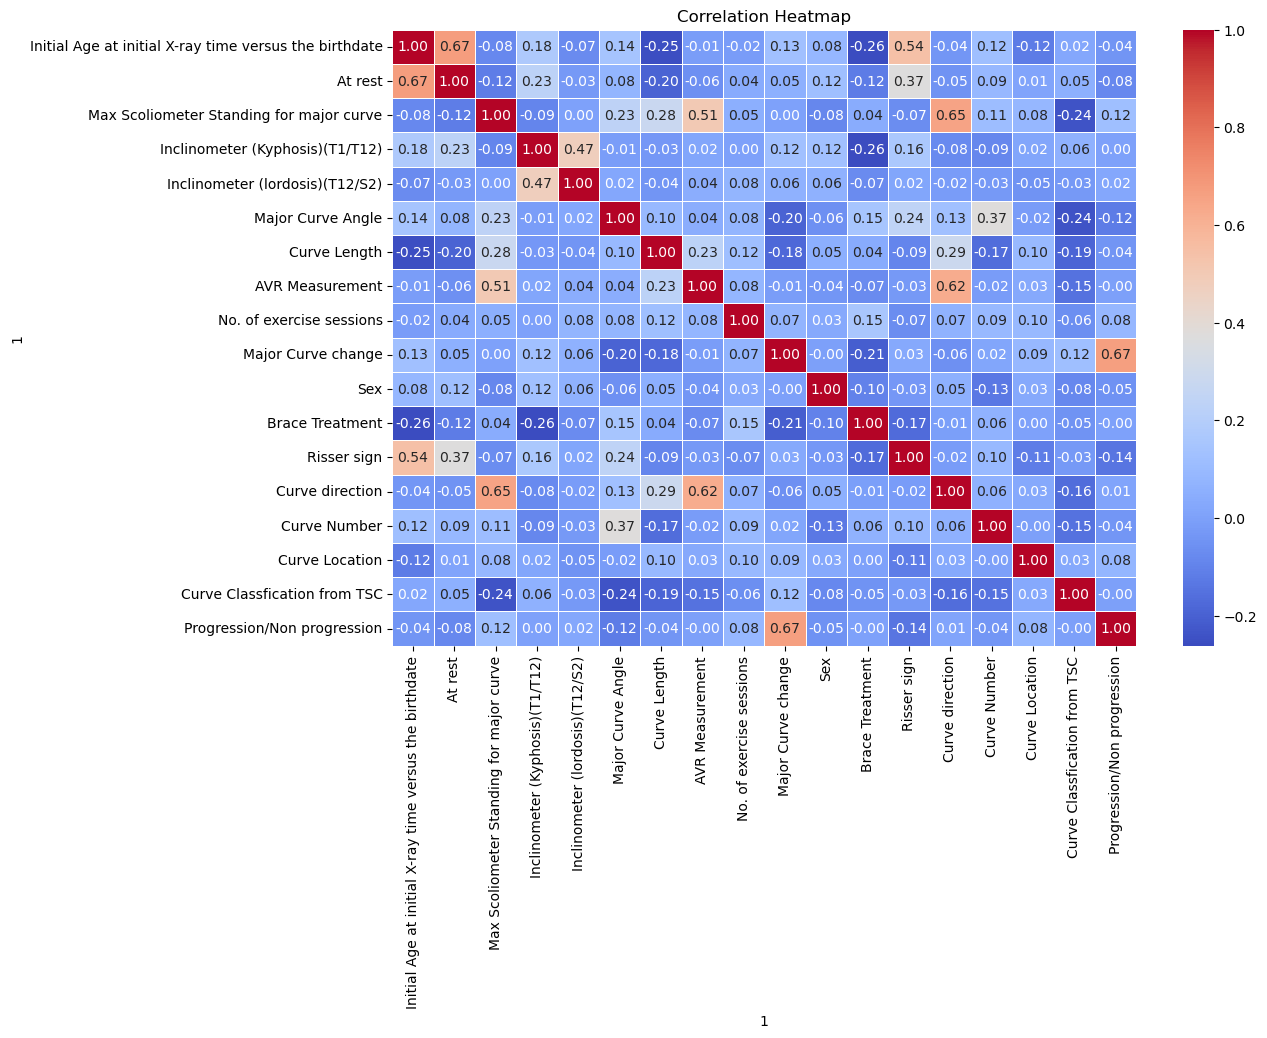

In [21]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#Detecting and Removing Outliers

In [23]:
numerical_columns = ['Initial Age at initial X-ray time versus the birthdate','At rest','Max Scoliometer Standing for major curve',
                     'Inclinometer (Kyphosis)(T1/T12)','Inclinometer (lordosis)(T12/S2)','Major Curve Angle',
                      'Curve Length','AVR Measurement','No. of exercise sessions']

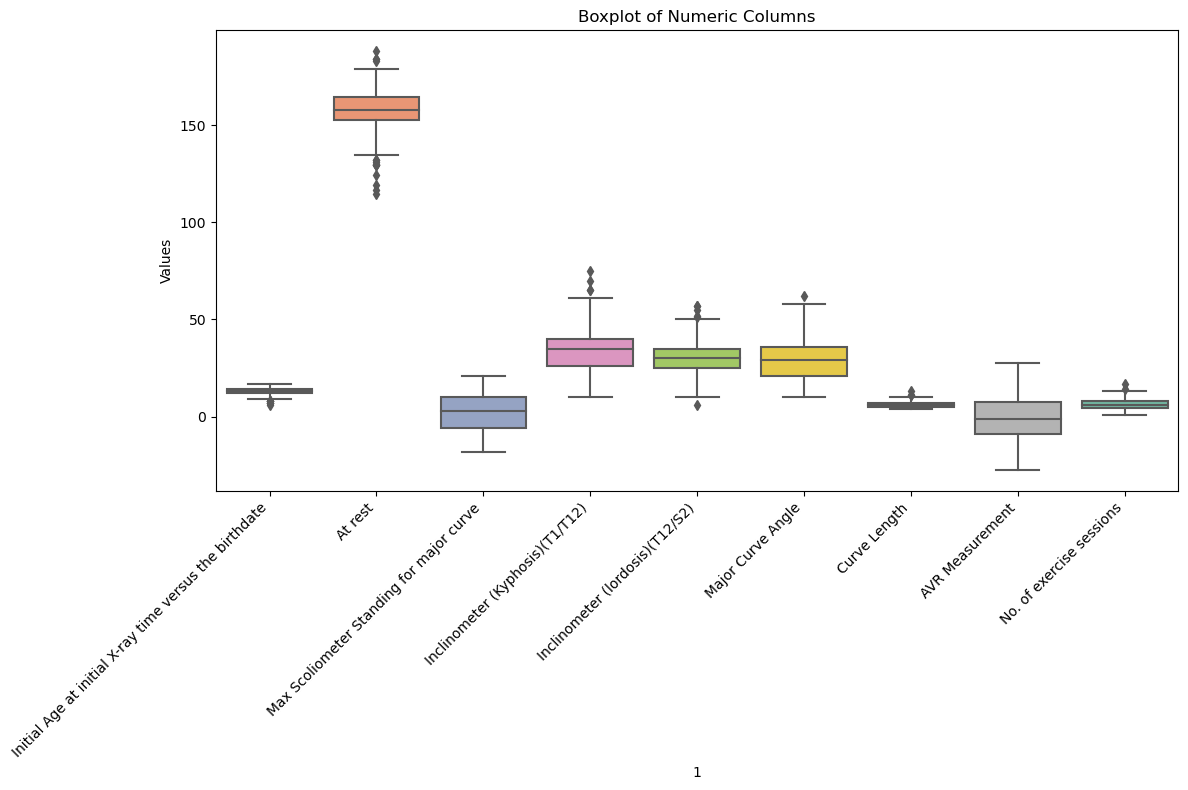

In [24]:
# Creating boxplots for each numeric column to check for Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=imp_df[numerical_columns], orient='v', palette='Set2')
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

From the above Box Plot, we can see that the Data has many outliers, however, its important to note that these outliers represent distinct features - specific parameter values differing from the majority patients. They are not the indication of true anomalies within the dataset.

In [26]:
# Removing the data of the patients who have distinct values for some parameters.
for i in [0,3]:
    def remove_outliers_iqr(df, columns):
        cleaned_df = df.copy()
        for column in columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
        return cleaned_df
    imp_df = remove_outliers_iqr(imp_df, numerical_columns)
imp_df.shape    #Running it twice to ensure no patient has distinct parameter values

(174, 18)

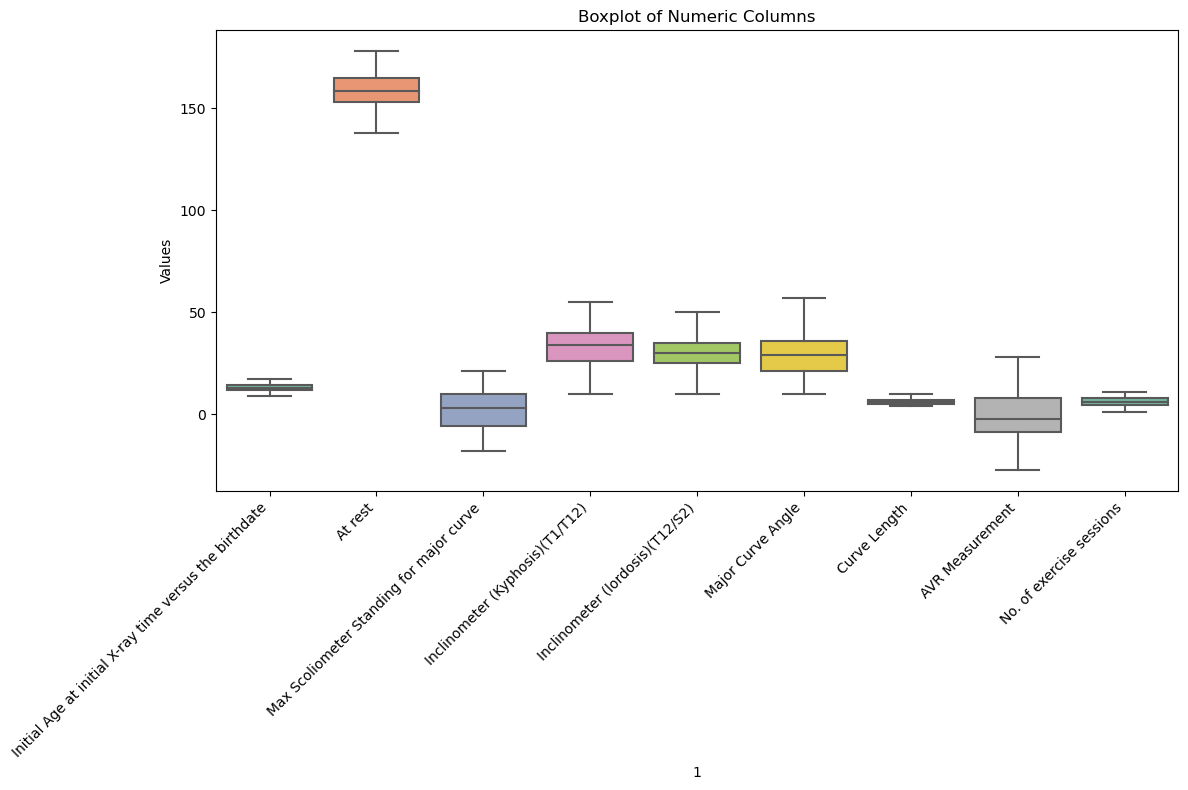

In [27]:
# Creating boxplots for each numeric column to check for distinct values
plt.figure(figsize=(12, 8))
sns.boxplot(data=imp_df[numerical_columns], orient='v', palette='Set2')
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In the plot above, the data of the patients show consistent values with no distinct variations among patients. 

In [28]:
#Now dividing the above Data into Training, and Test Sets:

In [29]:
#Scaling the Input Data, and splitting the entire data set into training and testing sets.
target_var1 = 'Major Curve change'
target_var2 = 'Progression/Non progression'

y1 = imp_df[target_var1]
y2 = imp_df[target_var2]
X = imp_df.drop(columns=[target_var1,target_var2])

X = X.apply(lambda X: (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0)))

#Splitting the Data for 1st Target Variable
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=6)

#Splitting the Data for 1st Target Variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=6)

In [30]:
print('Shape of Training Set for predicting Target Variable 1:',X1_train.shape)
print('Shape of Testing Set for predicting Target Variable:',X1_test.shape)
print('Shape of Training Set for predicting Target Variable 2:',X2_train.shape)
print('Shape of Testing Set for predicting Target Variable 2:',X2_test.shape)
print('Shape of Training Set of Target Variable 1:',y1_train.shape)
print('Shape of Testing Set of Target Variable 1:',y1_test.shape)
print('Shape of Training Set of Target Variable 2:',y2_train.shape)
print('Shape of Testing Set of Target Variable 2:',y2_test.shape)

Shape of Training Set for predicting Target Variable 1: (139, 16)
Shape of Testing Set for predicting Target Variable: (35, 16)
Shape of Training Set for predicting Target Variable 2: (139, 16)
Shape of Testing Set for predicting Target Variable 2: (35, 16)
Shape of Training Set of Target Variable 1: (139,)
Shape of Testing Set of Target Variable 1: (35,)
Shape of Training Set of Target Variable 2: (139,)
Shape of Testing Set of Target Variable 2: (35,)


# Algorithms for Predicting Major Curve Change [Target Variable - I]

# Model - I: Support Vector Machine (SVM)

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__C': [0.001, 0.1, 1, 10, 100],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the data to the Model
grid_search.fit(X1_train, y1_train)
svm_model_reg = grid_search.best_estimator_

# Predicting on the test set
y1_pred_svm = svm_model_reg.predict(X1_test)

# Evaluating the Model
mse1_svm = mean_squared_error(y1_test, y1_pred_svm)
print("Mean Squared Error:", mse1_svm)

rmse = np.sqrt(mse1_svm)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y1_test, y1_pred_svm)
print("Mean Absolute Error:", mae)

train_score = svm_model_reg.score(X1_train, y1_train)
print("Training set score:", train_score)

test_score = svm_model_reg.score(X1_test, y1_pred_svm)
print("Testing set score:", test_score)


Mean Squared Error: 47.546327505138784
Root Mean Squared Error: 6.895384507417899
Mean Absolute Error: 5.145173282267814
Training set score: 0.11196476903705721
Testing set score: 1.0


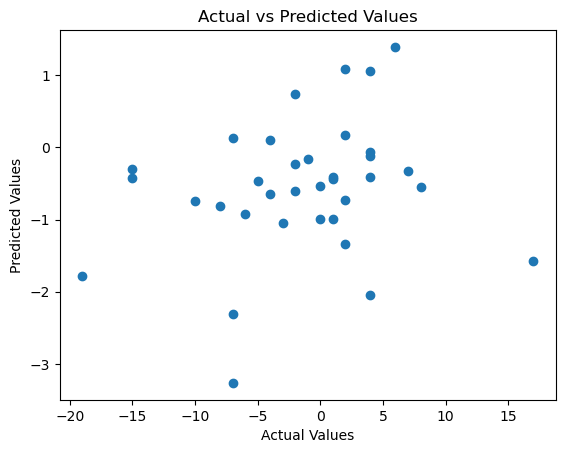

In [32]:
# Plotting the Scatter Plot
plt.scatter(y1_test, y1_pred_svm)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Linear Regression

In [33]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [34]:
# Fitting the data to the Model
Linear_model = LinearRegression(fit_intercept=True)
Linear_model.fit(X1_train, y1_train)

LinearRegression()

In [35]:
# Predicting on the test set
y1_pred_lm = Linear_model.predict(X1_test)

In [36]:
# Evaluating the Model
mse1_lin_reg = mean_squared_error(y1_test, y1_pred_lm)
print("Mean Squared Error:", mse1_lin_reg)

rmse = np.sqrt(mse1_lin_reg)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y1_test, y1_pred_lm)
print("Mean Absolute Error:", mae)

train_score = Linear_model.score(X1_train, y1_train)
print("Training set score:", train_score)

test_score = Linear_model.score(X1_test, y1_test)
print("Testing set score:", test_score)

Mean Squared Error: 51.56317176340881
Root Mean Squared Error: 7.180750083620012
Mean Absolute Error: 5.307387111854498
Training set score: 0.17037495649603618
Testing set score: -0.056516331752848314


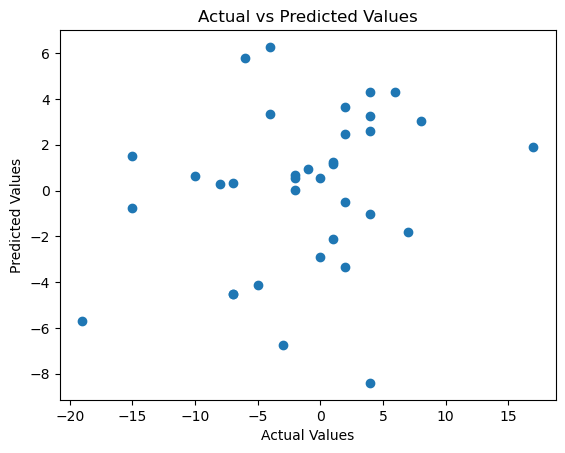

In [37]:
# Plotting the Scatter Plot
plt.scatter(y1_test, y1_pred_lm)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# K-Nearest Neighbors (KNN)

In [38]:
from sklearn.neighbors import KNeighborsRegressor

# Setting the Neighbours to 5
knn_regressor = KNeighborsRegressor(n_neighbors=5)  

# Fitting the data to the Model
knn_regressor.fit(X1_train, y1_train)

# Predicting on the test set
y1_pred_knn = knn_regressor.predict(X1_test)

# Evaluating the Model
mse1_knn = mean_squared_error(y1_test, y1_pred_knn)
print("Mean Squared Error:", mse1_knn)

rmse = np.sqrt(mse1_knn)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y1_test, y1_pred_knn)
print("Mean Absolute Error:", mae)

train_score = knn_regressor.score(X1_train, y1_train)
print("Training set score:", train_score)

test_score = knn_regressor.score(X1_test, y1_test)
print("Testing set score:", test_score)

Mean Squared Error: 45.65942857142856
Root Mean Squared Error: 6.757176079652547
Mean Absolute Error: 5.177142857142857
Training set score: 0.21510358354997883
Testing set score: 0.06444987120730628


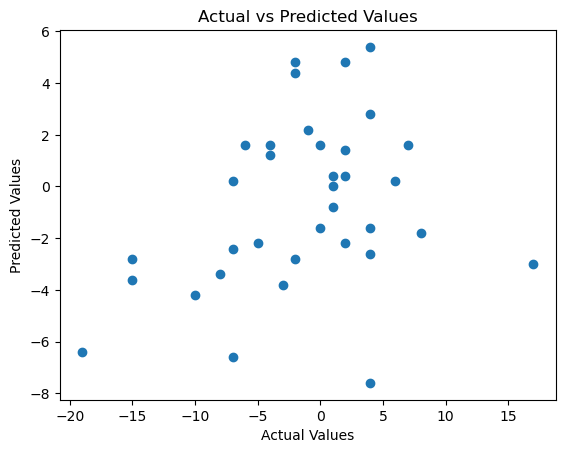

In [39]:
# Plotting the Scatter Plot
plt.scatter(y1_test, y1_pred_knn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting the Data to the Model
model_RF.fit(X1_train, y1_train)

# Predicting on the test set
y1_pred_RF = model_RF.predict(X1_test)

# Evaluate the model performance
mse1_RF = mean_squared_error(y1_test, y1_pred_RF)
print("Mean Squared Error:", mse1_RF)

rmse = np.sqrt(mse1_RF)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y1_test, y1_pred_RF)
print("Mean Absolute Error:", mae)

train_score = model_RF.score(X1_train, y1_train)
print("Training set score:", train_score)

test_score = model_RF.score(X1_test, y1_test)
print("Testing set score:", test_score)

Mean Squared Error: 55.95780785714285
Root Mean Squared Error: 7.480495161227153
Mean Absolute Error: 5.8467142857142855
Training set score: 0.8497888845960442
Testing set score: -0.14656131243100368


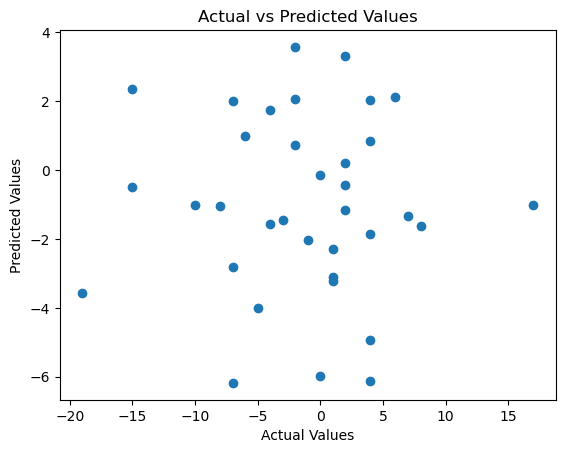

In [41]:
# Plotting the Scatter Plot
plt.scatter(y1_test, y1_pred_RF)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

                                                    Importance
1                                                             
Major Curve Angle                                     0.126490
At rest                                               0.114073
Inclinometer (lordosis)(T12/S2)                       0.112221
Curve Classfication from TSC                          0.105996
AVR Measurement                                       0.094583
Max Scoliometer Standing for major curve              0.090514
Inclinometer (Kyphosis)(T1/T12)                       0.073906
No. of exercise sessions                              0.068797
Curve Length                                          0.044321
Risser sign                                           0.041957
Initial Age at initial X-ray time versus the bi...    0.039026
Brace Treatment                                       0.037946
Curve Location                                        0.023200
Curve Number                                          0

<Figure size 1000x600 with 0 Axes>

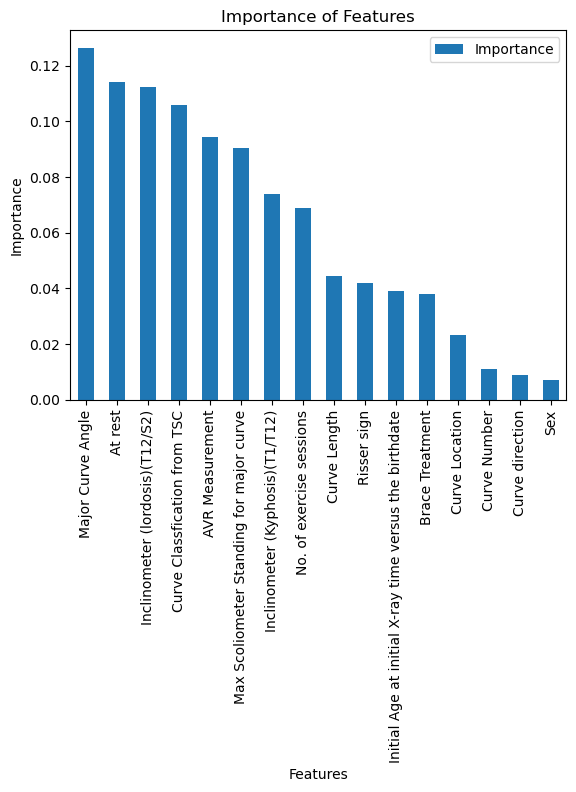

In [42]:
# With the help of Random Forest Method sorting the features in the order of their importance in predicting the target variable Y1
importances = model_RF.feature_importances_
feature_names = X1_train.columns  
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["Importance"])

# Sorting the features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print(feature_importances)

# Plotting to visualize the Important features 
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Importance of Features")
plt.show()

# Decision Tree 

In [43]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=32)

# Fitting the Data to the Model
model_DT.fit(X1_train, y1_train)

# Predicting on the test set
y1_pred_DT = model_DT.predict(X1_test)

# Evaluating the Model Performance
mse1_DT = mean_squared_error(y1_test, y1_pred_DT)
print("Mean Squared Error:", mse1_DT)

rmse = np.sqrt(mse1_DT)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y1_test, y1_pred_DT)
print("Mean Absolute Error:", mae)

train_score = model_DT.score(X1_train, y1_train)
print("Training set score:", train_score)

test_score = model_DT.score(X1_test, y1_test)
print("Testing set score:", test_score)


Mean Squared Error: 70.65714285714286
Root Mean Squared Error: 8.40578032410691
Mean Absolute Error: 7.114285714285714
Training set score: 1.0
Testing set score: -0.44774696417221427


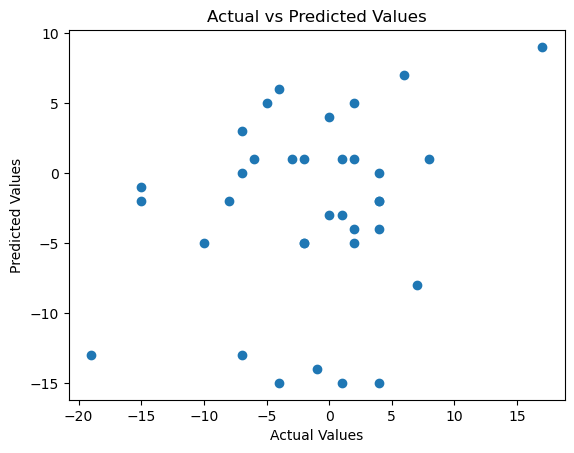

In [44]:
# Plotting the Scatter Plot
plt.scatter(y1_test, y1_pred_DT)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Artificial Neural Network Model

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Defining the ANN model
model_ANN = Sequential()
model_ANN.add(Dense(64, input_dim=X1_train.shape[1], activation='relu'))
model_ANN.add(Dense(32, activation='relu'))
model_ANN.add(Dense(1, activation='linear'))

# Compiling the model
model_ANN.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the data to the Model
history = model_ANN.fit(X1_train, y1_train, epochs=100, batch_size=32, validation_split=0.2)

# Predicting on the test set
y1_pred_ann = model_ANN.predict(X1_test)

# Evaluating the model performance
mse1_ann = mean_squared_error(y1_test, y1_pred_ann)
print("Mean Squared Error (ANN):", mse1_ann)

rmse = np.sqrt(mse1_ann)
print("Root Mean Squared Error:", rmse)

mae_ann = mean_absolute_error(y1_test, y1_pred_ann)
print("Mean Absolute Error (ANN):", mae_ann)

train_score_ann = model_ANN.evaluate(X1_train, y1_train)
print("Training set score (ANN):", train_score_ann)

test_score_ann = model_ANN.evaluate(X1_test, y1_test)
print("Testing set score (ANN):", test_score_ann)


Epoch 1/100


/Users/rushikaneeli/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.3117 - val_loss: 130.1278
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.6832 - val_loss: 129.9095
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.1198 - val_loss: 129.5463
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.9481 - val_loss: 129.1999
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.5202 - val_loss: 128.9138
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.2100 - val_loss: 128.6336
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.1130 - val_loss: 128.4060
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.5268 - val_loss: 128.1410
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.6762 - val_loss: 127.9051
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.1652 - val_loss: 127.6671
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.0208 - val_loss: 127.3856
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.24

Epoch 69/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.9719 - val_loss: 118.9512
Epoch 70/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.7630 - val_loss: 118.9457
Epoch 71/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.0476 - val_loss: 119.0107
Epoch 72/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.1073 - val_loss: 119.3009
Epoch 73/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.7214 - val_loss: 119.3696
Epoch 74/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.2244 - val_loss: 119.6375
Epoch 75/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.2792 - val_loss: 119.1188
Epoch 76/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.4698 - val_loss: 118.9347
Epoch 77/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.1573 - val_loss: 118.6688
Epoch 78/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.1939 - val_loss: 118.4215
Epoch 79/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.4853 - val_loss: 118.6707
Epoch 80/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

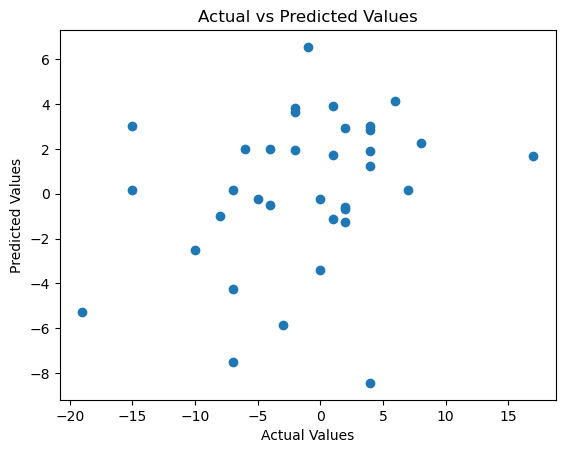

In [46]:
# Plotting the Scatter Plot
plt.scatter(y1_test, y1_pred_ann)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Dimensionality Reduction

In [47]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

pca = PCA(n_components=0.95)

X1_train_pca = pca.fit_transform(X1_train)
X1_test_pca = pca.transform(X1_test)
print(f"Number of PCA components retained: {pca.n_components_}")

regressor = RandomForestRegressor(random_state=42)

# Fitting the Data to the Model
regressor.fit(X1_train_pca, y1_train)

# Predicting on the test set
y1_pred_pca = regressor.predict(X1_test_pca)

# Evaluating the Model
mse1_pca = mean_squared_error(y1_test, y1_pred_pca)
print("Mean Squared Error:", mse1_pca)

rmse = np.sqrt(mse1_pca)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y1_test, y1_pred_pca)
print("Mean Absolute Error:", mae)

train_score = regressor.score(X1_train_pca, y1_train)
print("Training set score:", train_score)

test_score = regressor.score(X1_test_pca, y1_test)
print("Testing set score:", test_score)

Number of PCA components retained: 13
Mean Squared Error: 76.159025
Root Mean Squared Error: 8.726913830215123
Mean Absolute Error: 6.642714285714287
Training set score: 0.8586703300439773
Testing set score: -0.5604791360017394


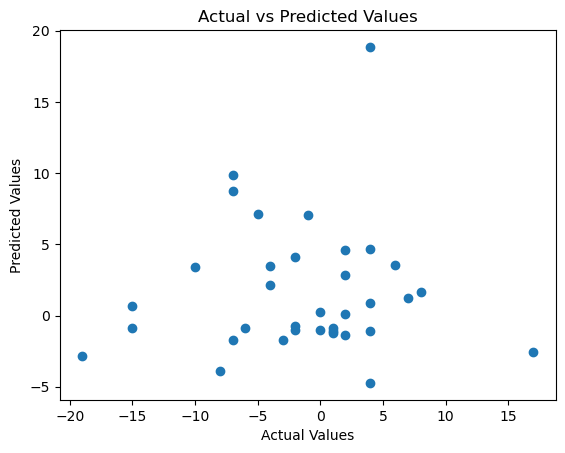

In [48]:
# Plotting the Scatter Plot
plt.scatter(y1_test, y1_pred_pca)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

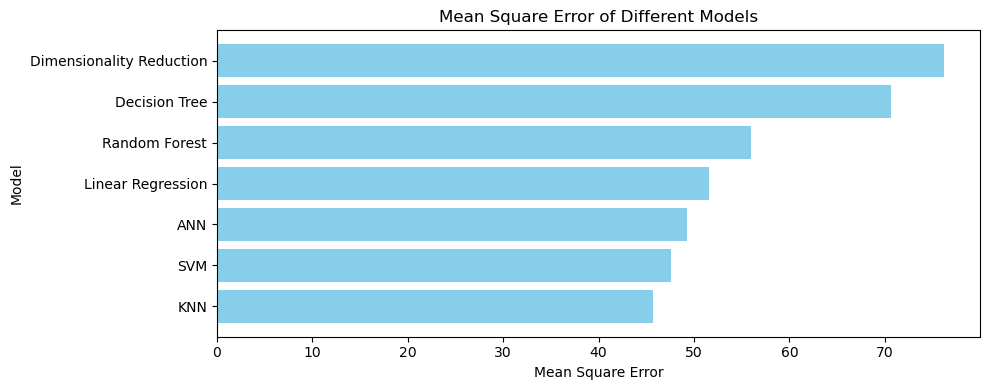

In [49]:
# Comparison of all the models
mse_values = [mse1_svm, mse1_lin_reg, mse1_knn, mse1_RF, mse1_DT, mse1_ann, mse1_pca]
model_names = ['SVM', 'Linear Regression', 'KNN', 'Random Forest', 'Decision Tree', 'ANN', 'Dimensionality Reduction']

# Sorting the MSE values and model names in ascending order
sorted_indices = sorted(range(len(mse_values)), key=lambda k: mse_values[k])
sorted_mse_values = [mse_values[i] for i in sorted_indices]
sorted_model_names = [model_names[i] for i in sorted_indices]

# Plotting the bar graph
plt.figure(figsize=(10, 4))
plt.barh(sorted_model_names, sorted_mse_values, color='skyblue')  # Horizontal bar plot
plt.xlabel('Mean Square Error')
plt.ylabel('Model')
plt.title('Mean Square Error of Different Models')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Algorithms for Predicting Curve Progression  [Target Variable - II]

# SVM

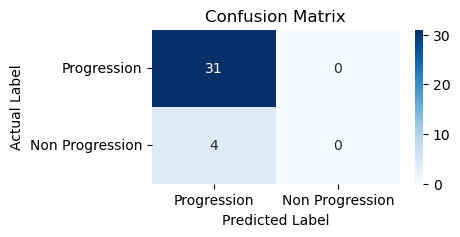

Accuracy(Testing Score): 0.8857142857142857
Precision Score:  0.44285714285714284
Recall Score: 0.5
F1 Score: 0.4696969696969697


/Users/rushikaneeli/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

cmodel_svm = SVC()

# Fitting the Data to the Model
cmodel_svm.fit(X2_train,y2_train)

# Predicting on the test set
y2_pred_SVM = cmodel_svm.predict(X2_test)

# Evaluating the Model
conf_matrix = confusion_matrix(y2_test, y2_pred_SVM)
class_labels = ['Progression', 'Non Progression']
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

accuracy_svm = accuracy_score(y2_test, y2_pred_SVM)
print("Accuracy(Testing Score):", accuracy_svm)

precision = precision_score(y2_test, y2_pred_SVM, average = 'macro')
print("Precision Score: ",precision)

recall = recall_score(y2_test, y2_pred_SVM, average = 'macro')
print("Recall Score:", recall)

f1 = f1_score(y2_test, y2_pred_SVM, average = 'macro')
print("F1 Score:", f1)


# Logistic Regression

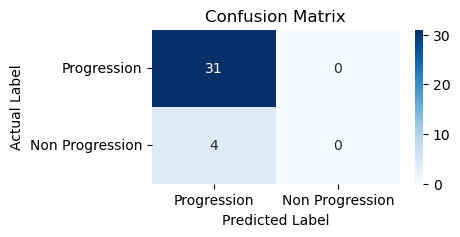

Accuracy: 0.8857142857142857
Precision: 0.44285714285714284
Recall: 0.5
F1-score: 0.4696969696969697


/Users/rushikaneeli/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

# Fitting the Data to the Model
model_LR.fit(X2_train,y2_train)

# Predicting on the test set
y2_pred_Log = model_LR.predict(X2_test)

# Evaluating the Model
conf_matrix_LR = confusion_matrix(y2_test,y2_pred_Log)
class_labels = ['Progression', 'Non Progression']
conf_matrix_df = pd.DataFrame(conf_matrix_LR, index=class_labels, columns=class_labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

accuracy_LR = accuracy_score(y2_test, y2_pred_Log)
print("Accuracy:", accuracy_LR)

precision = precision_score(y2_test, y2_pred_Log, average = 'macro')
print("Precision:", precision)

recall = recall_score(y2_test, y2_pred_Log, average = 'macro')
print("Recall:", recall)

f1 = f1_score(y2_test, y2_pred_Log, average = 'macro')
print("F1-score:", f1)


# KNN

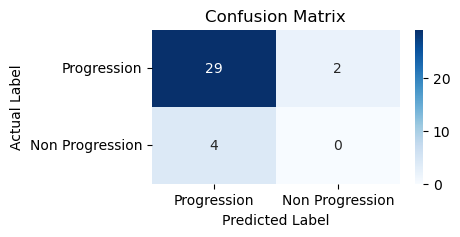

Accuracy: 0.8285714285714286
Precision: 0.4393939393939394
Recall: 0.46774193548387094
F1-score: 0.453125


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Considering 5 neighbours
k = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fitting the  classifier
knn_classifier.fit(X2_train, y2_train)

# Predicting on the test set
y2_pred_knn = knn_classifier.predict(X2_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y2_test, y2_pred_knn)
class_labels = ['Progression', 'Non Progression']
conf_matrix_df = pd.DataFrame(conf_matrix_knn, index=class_labels, columns=class_labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

accuracy_knn = accuracy_score(y2_test, y2_pred_knn)
print("Accuracy:", accuracy_knn)

precision = precision_score(y2_test, y2_pred_knn, average = 'macro')
print("Precision:", precision)

recall = recall_score(y2_test, y2_pred_knn, average = 'macro')
print("Recall:", recall)

f1 = f1_score(y2_test, y2_pred_knn, average = 'macro')
print("F1-score:", f1)

# Random Forest

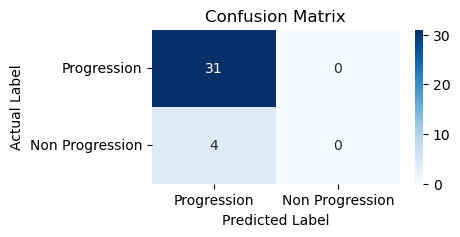

Accuracy: 0.8857142857142857
Precision: 0.44285714285714284
Recall: 0.5
F1-score: 0.4696969696969697


/Users/rushikaneeli/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
from sklearn.ensemble import RandomForestClassifier

model2_RF = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state = 0)

# Fitting the Data to the Model
model2_RF.fit(X2_train, y2_train)

# Predicting on the test set
y2_pred_RF = model2_RF.predict(X2_test)

# Evaluating the Model
cm_RF = confusion_matrix(y2_test, y2_pred_RF)
class_labels = ['Progression', 'Non Progression']
conf_matrix_df = pd.DataFrame(cm_RF, index=class_labels, columns=class_labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

accuracy_RF = accuracy_score(y2_test, y2_pred_RF)
print("Accuracy:",accuracy_RF)

precision = precision_score(y2_test, y2_pred_RF, average = 'macro')
print("Precision:", precision)

recall = recall_score(y2_test, y2_pred_RF, average = 'macro')
print("Recall:", recall)

f1 = f1_score(y2_test, y2_pred_RF, average = 'macro')
print("F1-score:", f1)

                                                    Importance
1                                                             
Major Curve Angle                                     0.126490
At rest                                               0.114073
Inclinometer (lordosis)(T12/S2)                       0.112221
Curve Classfication from TSC                          0.105996
AVR Measurement                                       0.094583
Max Scoliometer Standing for major curve              0.090514
Inclinometer (Kyphosis)(T1/T12)                       0.073906
No. of exercise sessions                              0.068797
Curve Length                                          0.044321
Risser sign                                           0.041957
Initial Age at initial X-ray time versus the bi...    0.039026
Brace Treatment                                       0.037946
Curve Location                                        0.023200
Curve Number                                          0

<Figure size 1000x600 with 0 Axes>

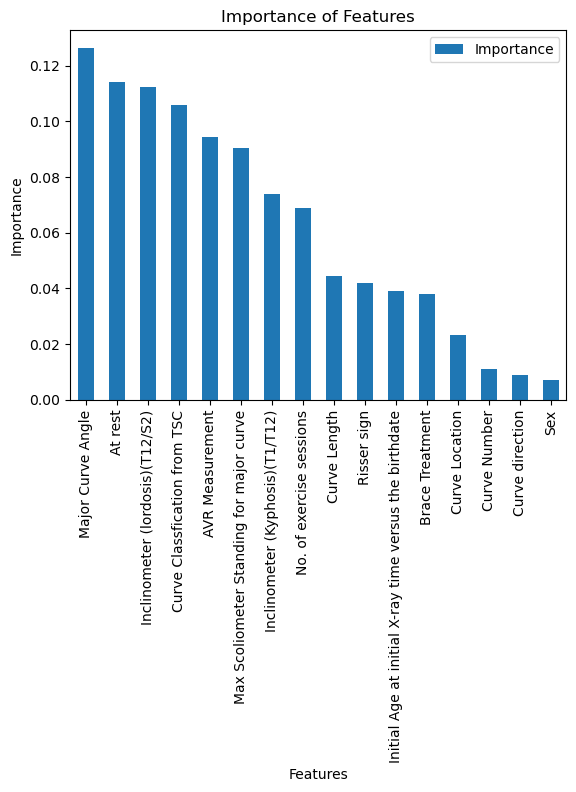

In [54]:
# With the help of Random Forest Method sorting the features in the order of their importance in predicting the target variable Y2
importances = model_RF.feature_importances_
feature_names = X2_train.columns  
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["Importance"])

# Sorting the features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print(feature_importances)

# Plotting to visualize the Important features 
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Importance of Features")
plt.show()

# Decision Tree

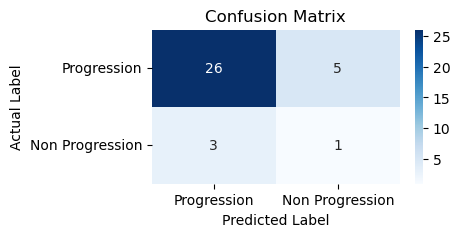

Accuracy: 0.7714285714285715
Precision: 0.7714285714285715
Recall: 0.25
F1-score: 0.2


In [55]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

model2_DT = tree.DecisionTreeClassifier()

# Fitting the Data to the Model
model2_DT.fit(X2_train, y2_train)

# Predicting on the test set
y2_pred_DT = model2_DT.predict(X2_test)

# Evaluating the Model
cm_DT = confusion_matrix(y2_test, y2_pred_DT)
class_labels = ['Progression', 'Non Progression']
conf_matrix_df = pd.DataFrame(cm_DT, index=class_labels, columns=class_labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

accuracy_DT = accuracy_score(y2_test, y2_pred_DT)
print("Accuracy:",accuracy_DT)

precision = precision_score(y2_test, y2_pred_DT, average = 'micro')
print("Precision:", precision)

recall = recall_score(y2_test, y2_pred_DT)
print("Recall:", recall)

f1 = f1_score(y2_test, y2_pred_DT)
print("F1-score:", f1)


# ANN

Epoch 1/100


/Users/rushikaneeli/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7075 - loss: 0.6756 - val_accuracy: 0.7857 - val_loss: 0.6405
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7542 - loss: 0.6395 - val_accuracy: 0.8214 - val_loss: 0.5952
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7855 - loss: 0.5979 - val_accuracy: 0.8214 - val_loss: 0.5570
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7334 - loss: 0.5889 - val_accuracy: 0.8214 - val_loss: 0.5296
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7740 - loss: 0.5506 - val_accuracy: 0.8214 - val_loss: 0.5103
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7990 - loss: 0.5247 - val_accuracy: 0.8214 - val_loss: 0.5004
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7917 - loss: 0.5186 - val_accuracy: 0.8214 - val_loss: 0.4975
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7823 - loss: 0.5266 - val_accuracy: 0.8214 - val_loss: 0.4963
Epoch 9/100

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.4065 - val_accuracy: 0.8214 - val_loss: 0.5327
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8259 - loss: 0.3602 - val_accuracy: 0.8214 - val_loss: 0.5353
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8242 - loss: 0.4014 - val_accuracy: 0.7857 - val_loss: 0.5368
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8347 - loss: 0.3707 - val_accuracy: 0.7857 - val_loss: 0.5406
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.3660 - val_accuracy: 0.7857 - val_loss: 0.5424
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8195 - loss: 0.4023 - val_accuracy: 0.7857 - val_loss: 0.5441
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.3728 - val_accuracy: 0.7857 - val_loss: 0.5470
Epoch 59/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3617 - val_accuracy: 0.7857 - val_loss: 0.5499
Epoch

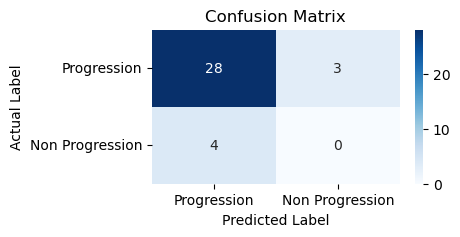

Accuracy(Testing Score): 0.8
Precision Score:  0.4375
Recall Score: 0.45161290322580644
F1 Score: 0.4444444444444444


In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Defining the ANN model
model2_ann = Sequential()
model2_ann.add(Dense(64, input_dim=X2_train.shape[1], activation='relu'))
model2_ann.add(Dense(32, activation='relu'))
model2_ann.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, change activation to 'softmax' for multi-class

model2_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the Data the model
history_ann = model2_ann.fit(X2_train, y2_train, epochs=100, batch_size=32, validation_split=0.2)

# Predicting on the test set
y2_pred_ann = (model2_ann.predict(X2_test) > 0.5).astype("int32")

# Evaluating the model
accuracy_ann = accuracy_score(y2_test, y2_pred_ann)
conf_matrix_ann = confusion_matrix(y2_test, y2_pred_ann)
precision_ann = precision_score(y2_test, y2_pred_ann, average='macro')
recall_ann = recall_score(y2_test, y2_pred_ann, average='macro')
f1_ann = f1_score(y2_test, y2_pred_ann, average='macro')

class_labels = ['Progression', 'Non Progression']
conf_matrix_df = pd.DataFrame(conf_matrix_ann, index=class_labels, columns=class_labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy(Testing Score):", accuracy_ann)
print("Precision Score: ", precision_ann)
print("Recall Score:", recall_ann)
print("F1 Score:", f1_ann)

# Dimensionality Reduction

Number of PCA components retained: 13


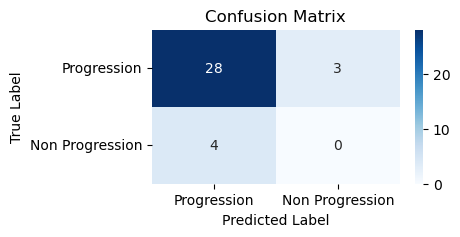

Accuracy: 0.8571428571428571
Precision: 0.4411764705882353
Recall: 0.4838709677419355
F1-score: 0.46153846153846156


In [57]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=0.95)

X2_train_pca = pca.fit_transform(X1_train)
X2_test_pca = pca.transform(X1_test)

# Checking the number of components to be retained
print(f"Number of PCA components retained: {pca.n_components_}")

model2_pca = RandomForestClassifier()

# Fitting the Data to the Model
model2_pca.fit(X2_train_pca, y2_train)

# Predicting on the Test set
y2_pred_pca = model2_pca.predict(X2_test_pca)

# Evaluating the Model
conf_matrix_DR = confusion_matrix(y2_test, y2_pred_ann)
class_labels = ['Progression', 'Non Progression']
conf_matrix_df = pd.DataFrame(conf_matrix_DR, index=class_labels, columns=class_labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy_DR = accuracy_score(y2_test, y2_pred_pca)
print(f"Accuracy: {accuracy_DR}")

precision = precision_score(y2_test, y2_pred_pca, average = 'macro')
print("Precision:", precision)

recall = recall_score(y2_test, y2_pred_pca, average = 'macro')
print("Recall:", recall)

f1 = f1_score(y2_test, y2_pred_pca, average = 'macro')
print("F1-score:", f1)

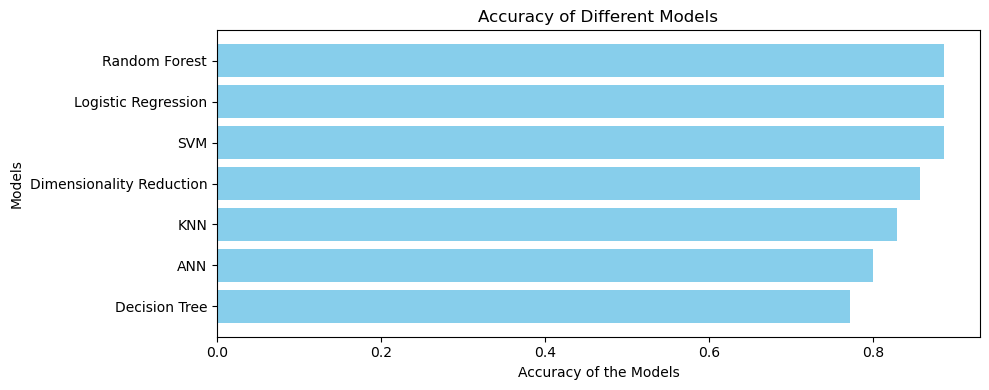

In [58]:
# Comparison of all the Classification models
accuracy_values = [accuracy_svm, accuracy_LR, accuracy_knn, accuracy_RF, accuracy_DT, accuracy_ann, accuracy_DR]
model_names = ['SVM', 'Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'ANN', 'Dimensionality Reduction']

# Sorting the Accuracies and model names in ascending order
sorted_indices = sorted(range(len(accuracy_values)), key=lambda k: accuracy_values[k])
sorted_accuracy_values = [accuracy_values[i] for i in sorted_indices]
sorted_model_names = [model_names[i] for i in sorted_indices]

# Plotting the bar graph
plt.figure(figsize=(10, 4))
plt.barh(sorted_model_names, sorted_accuracy_values, color='skyblue')  # Horizontal bar plot
plt.xlabel('Accuracy of the Models')
plt.ylabel('Models')
plt.title('Accuracy of Different Models')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [59]:
from scipy.stats import ttest_ind, chi2_contingency

# Performing t-test for the Regression target variable
t_stat, p_value = ttest_ind(y1[X['Brace Treatment'] == 0], y1[X['Brace Treatment'] == 1])
print("T-test Results for Major Curve change:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Perform chi-square test for the Categorical target variable
chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(X['Brace Treatment'], y2))
print("\nChi-square Test Results for Progression/Non progression:")
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)


T-test Results for Major Curve change:
T-statistic: 2.9609776929676945
P-value: 0.0035000574344818936

Chi-square Test Results for Progression/Non progression:
Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1


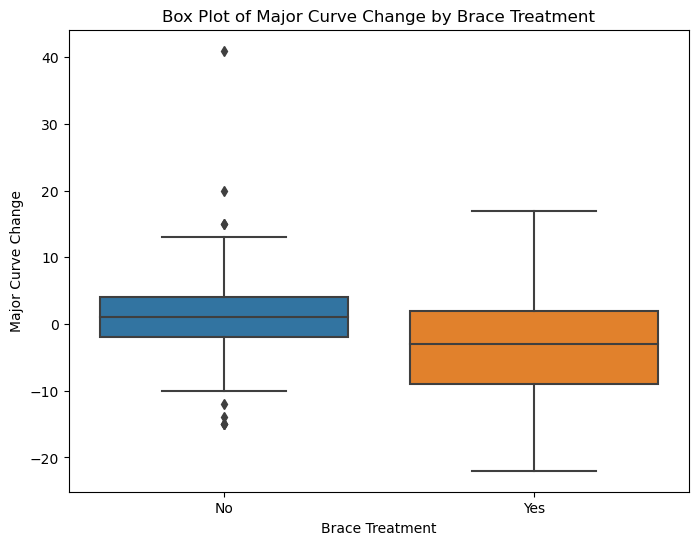

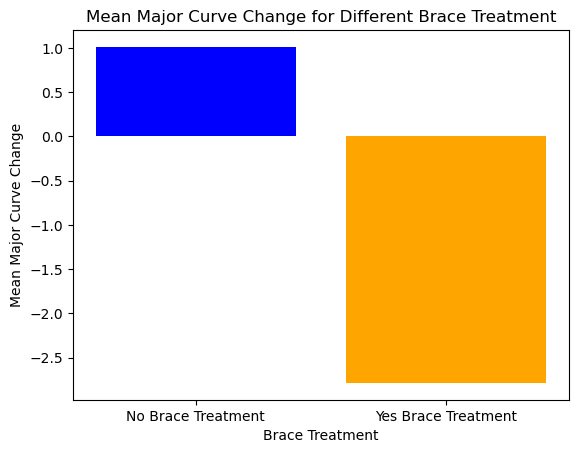

In [60]:
# Filtering the data for the two groups based on "Brace Treatment" (0 for no, 1 for yes)
major_curve_change_no_brace = imp_df.loc[imp_df['Brace Treatment'] == 0, 'Major Curve change']
major_curve_change_yes_brace = imp_df.loc[imp_df['Brace Treatment'] == 1, 'Major Curve change']

df = pd.DataFrame({'Brace Treatment': np.repeat(['No', 'Yes'], [major_curve_change_no_brace.shape[0], major_curve_change_yes_brace.shape[0]]),
                   'Major Curve Change': np.concatenate([major_curve_change_no_brace.values, major_curve_change_yes_brace.values])})

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Brace Treatment', y='Major Curve Change', data=df)
plt.title('Box Plot of Major Curve Change by Brace Treatment')
plt.xlabel('Brace Treatment')
plt.ylabel('Major Curve Change')
plt.show()

# Calculating the mean of the "Major Curve change" for the two groups
mean_change_no_brace = major_curve_change_no_brace.mean()
mean_change_yes_brace = major_curve_change_yes_brace.mean()

# Plotting the results
plt.bar(['No Brace Treatment', 'Yes Brace Treatment'], [mean_change_no_brace, mean_change_yes_brace], color=['blue', 'orange'])
plt.xlabel('Brace Treatment')
plt.ylabel('Mean Major Curve Change')
plt.title('Mean Major Curve Change for Different Brace Treatment')
plt.show()
